# 베르누이 확률 분포

## 베르누이 시도

결과가 성공(Success) 혹은 실패(Fail) 두 가지 중 하나로만 나오는 것을 **베르누이 시도**(Bernoulli trial)라고 한다. 예를 들어 동전을 한 번 던져 앞면(H:Head)이 나오거나 뒷면(T:Tail)이 나오게 하는 것은 베르누이 시도의 일종이다.

베르누이 시도의 결과를 확률 변수(random variable) $X$ 로 나타낼 때는 일반적으로 성공을 정수 1 ($X=1$), 실패를 정수 0 ($X=0$)으로 정한다. 때로는  실패를 0 이 아닌 -1($X=-1$)로 정하는 경우도 있다.

## 베르누이 분포

베르누이 확률 변수는 0, 1 두 가지 값 중 하나만 가질 수 있으므로 이산 확률 변수(discrete random variable)이다. 따라서 확률 질량 함수(pmf: probability mass function)와 누적 분포 함수(cdf:cumulataive distribution function)으로 정의할 수 있다. 

베르누이 확률 변수는 **1이 나올 확률 $\theta$** 라는 하나의 모수(parameter)만을 가진다. 0이 나올 확률은 $1 - \theta$ 로 정의된다.

베르누이 확률 분포의 확률 질량 함수는 다음과 같다.

$$
\text{Bern}(x;\theta) = 
\begin{cases} 
\theta   & \text{if }x=1, \\
1-\theta & \text{if }x=0
\end{cases}
$$

이를 case문 없이 하나의 수식으로 표현하면 다음과 같이 쓸 수도 있다.

$$
\text{Bern}(x;\theta) = \theta^x(1-\theta)^{(1-x)}
$$

만약 베르누이 확률 변수가 1과 -1이라는 값을 가진다면 다음과 같은 수식으로 써야 한다.

$$ \text{Bern}(x; \theta) = \theta^{(1+x)/2} (1-\theta)^{(1-x)/2} $$

만약 어떤 확률 변수 $X$가 베르누이 분포에 의해 발생된다면 **"확률 변수 $X$가 베르누이 분포를 따른다"**라고 말하고 다음과 같이 수식으로 쓴다.

$$ X \sim \text{Bern}(x;\theta) $$

## SciPy를 사용한 베르누이 분포의 시뮬레이션

Scipy의 stats 서브 패키지에 있는 `bernoulli` 클래스가 베르누이 확률 분포를 위한 클래스다. `p` 인수로 분포의 모수 $\theta$을 설정한다. 

다음 예에서는 p = 0.6 으로 설정하였다.

In [1]:
theta = 0.6
rv = sp.stats.bernoulli(theta)
rv

`pmf` 메서드를 사용하면 확률 질량 함수(pmf: probability mass function)를 계산할 수 있다.

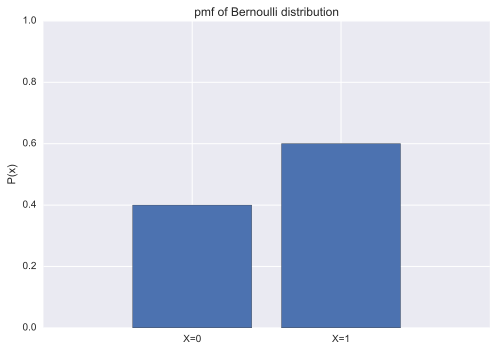

In [2]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["X=0", "X=1"])
plt.ylabel("P(x)")
plt.title("pmf of Bernoulli distribution")
plt.show()

시뮬레이션을 하려면 `rvs` 메서드를 사용한다.

In [3]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1])

결과를 seaborn의 `countplot` 명령으로 시각화한다.

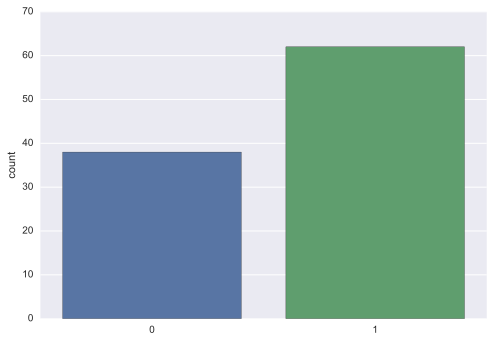

In [4]:
sns.countplot(x)
plt.show()

이론적인 확률 분포와 샘플의 확률 분포를 동시에 나타내려면 다음과 같은 코드를 사용한다.

NumPy의 `bincount` 명령으로 값이 0인 데이터의 수와 값이 1인 데이터의 수를 세고 이를 데이터프레임에 정리했다.

In [5]:
y = np.bincount(x, minlength=2)/float(len(x))
df = pd.DataFrame({"theoretic": rv.pmf(xx), "simulation": y}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.pivot("value", "type", "ratio")

type   simulation  theoretic
value                       
0            0.38        0.4
1            0.62        0.6

seaborn의 `barplot` 명령으로 시각화하면 다음과 같다.

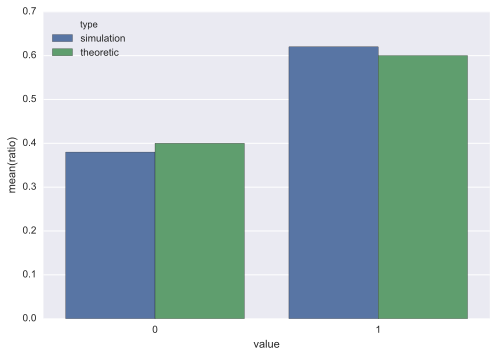

In [6]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

## 베르누이 분포의 모멘트

베르누이 분포의 모멘트는 다음과 같다.

### 기댓값

$$\text{E}[X]  = \theta$$

(증명)

$$\text{E}[X]  = 1 \cdot \theta + 0 \cdot (1 - \theta) =  \theta$$

### 분산

$$\text{Var}[X] = \theta(1-\theta)$$

(증명)

$$\text{Var}[X] = (1 - \theta)^2 \cdot \theta + (0 - \theta)^2 \cdot (1 - \theta) = \theta(1-\theta)$$

앞의 예에서는 $\theta = 0.6$이였으므로 이론적인 기댓값과 분산은 다음과 같다.

$$ \text{E}[X] = 0.6 $$
$$ \text{Var}[X] = 0.6 \cdot (1 - 0.6) = 0.24 $$

데이터에서 계산한 샘플 평균 및 샘플 분산은 다음과 같이 계산한다.

In [7]:
np.mean(x)

0.62

In [8]:
np.var(x, ddof=1)

0.23797979797979804

SciPy의 describe 명령을 쓰면 다음과 같이 계산할 수 있다.

In [9]:
s = sp.stats.describe(x)
s[2], s[3]

(0.62, 0.23797979797979804)

또는 Pandas의 Series객체로 바꾸어 describe 메서드를 써서 다음과 같이 계산한다.

In [10]:
pd.Series(x).describe()

count    100.000000
mean       0.620000
std        0.487832
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

### 연습 문제 1

베르누이 확률 분포의 모수가 다음과 같을 경우에 각각 샘플을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률 밀도 함수와 비교한 카운트 플롯을 그린다.
샘플의 갯수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

1. $\theta = 0.5$
2. $\theta = 0.9$